<a href="https://colab.research.google.com/github/sgpatel/MachineLearning/blob/master/SharePrice_Prediction_Model_Reliance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

company = 'RELIANCE.NS'

startDate = dt.datetime(2012,1,1)
endDate = dt.datetime(2021,1,1)
fb = yf.Ticker(company)
data=fb.history(start=startDate,end=endDate)

print(data)

                                  Open         High          Low        Close  \
Date                                                                            
2012-01-02 00:00:00+05:30   317.622730   323.525721   313.223965   322.067078   
2012-01-03 00:00:00+05:30   324.665355   331.343281   323.799285   330.317657   
2012-01-04 00:00:00+05:30   331.571172   333.189370   325.166771   326.443085   
2012-01-05 00:00:00+05:30   325.918879   330.454393   316.392026   318.853516   
2012-01-06 00:00:00+05:30   317.736686   330.021329   317.554355   327.081207   
...                                ...          ...          ...          ...   
2020-12-24 00:00:00+05:30  1934.931184  1986.410141  1933.838026  1981.788940   
2020-12-28 00:00:00+05:30  1994.261030  2005.491033  1982.931792  1990.882202   
2020-12-29 00:00:00+05:30  1996.546842  1999.826435  1970.260846  1977.714355   
2020-12-30 00:00:00+05:30  1982.882043  1994.757920  1963.304206  1983.130493   
2020-12-31 00:00:00+05:30  1

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days =60

x_train =[]
y_train =[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
  #  print(x_train)
  #  print(y_train)
               
            
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
               
model = Sequential()
               
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25, batch_size=32)
          
'''Test the model Accuracy on existing data '''
          
test_start = dt.datetime(2021,1,2)
test_end = dt.datetime.now()
#test_end = dt.datetime(2023,1,25)
          
test_data =fb.history(start=test_start,end=test_end)        
               
actual_prices = test_data['Close'].values
          
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)
          
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
          
          
# Make Prediction on test data
          
x_test =[]
          
for x in range(prediction_days,len(model_inputs)):
          x_test.append(model_inputs[x-prediction_days:x,0])
          
x_test= np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
                        
predicted_prices = model.predict(x_test)
print('before transform')
#print(predicted_prices)
predicted_prices = scaler.inverse_transform(predicted_prices)


Epoch 1/25
68/68 [==============================] - 5s 12ms/step - loss: 0.0077
Epoch 2/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 3/25
68/68 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 4/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 5/25
68/68 [==============================] - 1s 11ms/step - loss: 0.0017
Epoch 6/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 7/25
68/68 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 8/25
68/68 [==============================] - 1s 11ms/step - loss: 0.0016
Epoch 9/25
68/68 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 10/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 11/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 12/25
68/68 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 13/25
68/68 [==================

[[1861.2463]
 [1865.8557]
 [1868.0531]
 [1864.5532]
 [1856.0114]
 [1845.8468]
 [1833.9048]
 [1825.2346]
 [1819.8181]
 [1818.6625]
 [1819.5442]
 [1824.1539]
 [1833.612 ]
 [1848.7606]
 [1870.1431]
 [1891.5573]
 [1902.861 ]
 [1900.2537]
 [1885.2968]
 [1860.5875]
 [1834.4427]
 [1813.2034]
 [1799.33  ]
 [1792.3104]
 [1790.6799]
 [1794.3813]
 [1801.9702]
 [1812.6215]
 [1829.6394]
 [1850.1722]
 [1870.5743]
 [1890.0574]
 [1908.6765]
 [1924.3407]
 [1936.9916]
 [1941.8558]
 [1940.4434]
 [1937.1805]
 [1939.3225]
 [1943.6232]
 [1949.5717]
 [1956.297 ]
 [1969.025 ]
 [1984.8793]
 [2001.4485]
 [2017.3943]
 [2031.2788]
 [2041.6489]
 [2045.4275]
 [2041.5048]
 [2031.4022]
 [2015.0413]
 [1992.454 ]
 [1971.5315]
 [1954.1215]
 [1942.8593]
 [1935.1138]
 [1926.3402]
 [1916.3307]
 [1908.0825]
 [1900.8733]
 [1896.0304]
 [1891.7667]
 [1887.267 ]
 [1883.7886]
 [1881.7709]
 [1879.6658]
 [1872.814 ]
 [1862.9463]
 [1852.6368]
 [1842.7186]
 [1832.2078]
 [1821.696 ]
 [1812.3402]
 [1804.6735]
 [1801.0123]
 [1804.3563]

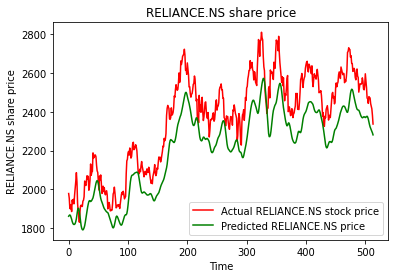

In [55]:
print(str(predicted_prices))
print(str(actual_prices))
plt.plot(actual_prices, color="red",label=f"Actual {company} stock price")
plt.plot(predicted_prices,color='green', label=f'Predicted {company} price')
plt.title(f"{company} share price")
plt.xlabel("Time")
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()


In [56]:

#Pridict Next Day

real_data = [model_inputs[len(model_inputs) +1 - prediction_days:len(model_inputs+1),0]]
#real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs),0]]

real_data =np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

print(f"Tomorrows {prediction}")

1/1 [==============================] - 1s 948ms/step
Tomorrows [[2267.0435]]
